In [1]:
#importing all libraries and tools
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten,Activation,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1000)

## Preprocessing

In [2]:
#loading image data from directory and segmenting it into train and test
image_size = (240, 240)
batch_size = 32

train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
"E:/Image/",
subset="training",
validation_split=0.20,    
image_size=image_size,
batch_size=batch_size,
seed=42,
shuffle=True)

val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
"E:/Image/",
subset="validation",
validation_split=0.20,    
image_size=image_size,
batch_size=batch_size,
seed=42,
shuffle=True)

Found 1158 files belonging to 3 classes.
Using 927 files for training.
Found 1158 files belonging to 3 classes.
Using 231 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

['Jeans_Images', 'Saree_Images', 'Trouser_Images']


In [4]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 240, 240, 3)
(32,)


In [5]:
#converting data from tensorflow to numpy arrays
image_batch=image_batch.numpy()
labels_batch=labels_batch.numpy()

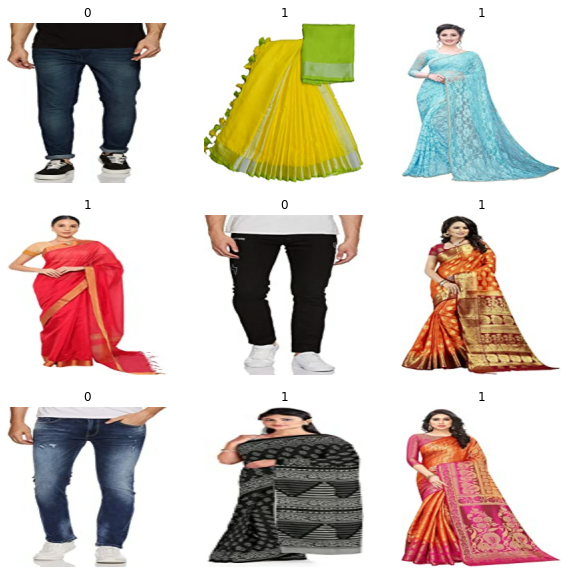

In [6]:
#getting sample view of first 9 labeled images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
#image augmentation to increase training data and reduce model overfitting
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)  
    ])

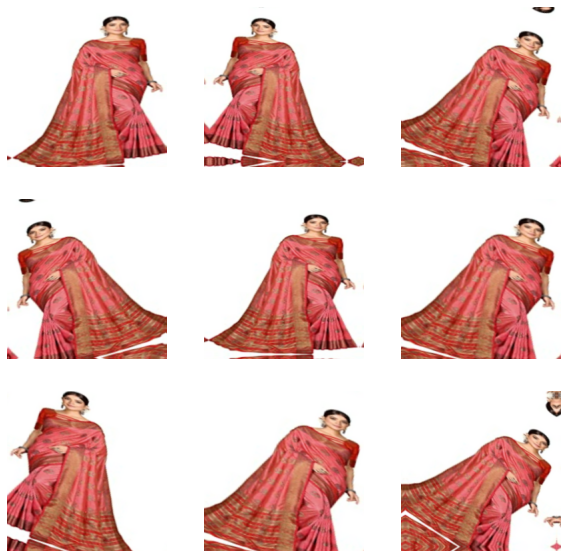

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy())
        plt.axis("off")

In [9]:
image_batch=data_augmentation(image_batch)

In [10]:
#Normalization of train and val input data to map all the input data into same scale i.e - from 0 to 1
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [12]:
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Below I used Alexnet deep feature learning neural network with 4 convolutional layers, 2 subsampling layers and 1 output layer as a model 

## Deep Learning Model building and validating results

In [13]:
#Sequential Model defining
model=Sequential()
#1st Convolutional layer
model.add(Conv2D(filters=96,input_shape=image_size + (3,),kernel_size=(11,11),strides=(4,4),padding='valid'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#Batch Normalization before passing it to the next layer
model.add(BatchNormalization())
#2nd Convolutional layer
model.add(Conv2D(filters=256,kernel_size=(11,11),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
#Batch Normalization before passing it to the next layer
model.add(BatchNormalization())
#3rd Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#Batch Normalization before passing it to the next layer
model.add(BatchNormalization())
#4th Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#flattening
model.add(Flatten())
#1sr Dense layer
model.add(Dense(4096))
model.add(Activation('relu'))
#add dropout to prevent overfitting
model.add(Dropout(0.4))
#Batch Normalization
model.add(BatchNormalization())
#2nd Dense layer
model.add(Dense(4096))
model.add(Activation('relu'))
#add dropout to prevent overfitting
model.add(Dropout(0.4))
#Batch Normalization
model.add(BatchNormalization())
#3rd Dense layer
model.add(Dense(1000))
model.add(Activation('relu'))
#add dropout to prevent overfitting
model.add(Dropout(0.4))
#Batch Normalization
model.add(BatchNormalization())
#output layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 58, 58, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 29, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 19, 19, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 256)        

In [14]:
#model compilation
opt = keras.optimizers.Adam(learning_rate=3e-4)
model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
#model training on input data and validating results on val data
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size  
)

Epoch 1/20
29/29 [==============================] - 146s 5s/step - loss: 0.9144 - accuracy: 0.6580 - val_loss: 1.9569 - val_accuracy: 0.5887
Epoch 2/20
29/29 [==============================] - 139s 5s/step - loss: 0.7181 - accuracy: 0.7465 - val_loss: 0.9118 - val_accuracy: 0.6710
Epoch 3/20
29/29 [==============================] - 139s 5s/step - loss: 0.6149 - accuracy: 0.7745 - val_loss: 0.9156 - val_accuracy: 0.6494
Epoch 4/20
29/29 [==============================] - 140s 5s/step - loss: 0.6603 - accuracy: 0.7422 - val_loss: 0.6152 - val_accuracy: 0.7749
Epoch 5/20
29/29 [==============================] - 138s 5s/step - loss: 0.5458 - accuracy: 0.7972 - val_loss: 0.8869 - val_accuracy: 0.6926
Epoch 6/20
29/29 [==============================] - 137s 5s/step - loss: 0.4693 - accuracy: 0.8177 - val_loss: 0.4854 - val_accuracy: 0.7879
Epoch 7/20
29/29 [==============================] - 138s 5s/step - loss: 0.4282 - accuracy: 0.8145 - val_loss: 2.4804 - val_accuracy: 0.3636
Epoch 8/20
29

In [17]:
loss, accuracy = model.evaluate(train_ds, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(val_ds, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8900
Testing Accuracy:  0.8485


In [18]:
test_loss, test_acc=model.evaluate(val_ds)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss,test_acc))

8/8 [==============================] - 8s 919ms/step - loss: 0.4378 - accuracy: 0.8485
Test Loss: 0.437807559967041 - Test Acc: 0.8484848737716675


In [19]:
train_loss, train_acc=model.evaluate(train_ds)
print("Train Loss: {0} - Train Acc: {1}".format(train_loss,train_acc))

29/29 [==============================] - 32s 1s/step - loss: 0.2471 - accuracy: 0.8900
Train Loss: 0.24710088968276978 - Train Acc: 0.8899676203727722


In [20]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

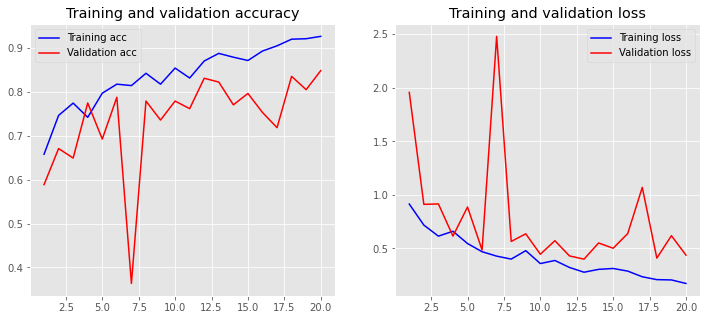

In [21]:
plot_history(history)

## Transfer Learning

In [22]:
base_model = tensorflow.keras.applications.MobileNetV2(input_shape = (240, 240, 3), include_top = False, weights = "imagenet")

In [23]:
base_model.trainable = False

In [24]:
model = tensorflow.keras.Sequential([base_model,
                                 tensorflow.keras.layers.GlobalAveragePooling2D(),
                                 tensorflow.keras.layers.Dropout(0.2),
                                 tensorflow.keras.layers.Dense(3, activation="softmax")                                     
                                ])

In [25]:
base_learning_rate = 0.0001
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,epochs = 100 , validation_data = val_ds)

C:\Users\key\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100


C:\Users\key\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


29/29 [==============================] - 61s 2s/step - loss: 1.0479 - accuracy: 0.5685 - val_loss: 0.8548 - val_accuracy: 0.6147
Epoch 2/100
29/29 [==============================] - 59s 2s/step - loss: 0.8028 - accuracy: 0.6343 - val_loss: 0.6983 - val_accuracy: 0.7013
Epoch 3/100
29/29 [==============================] - 60s 2s/step - loss: 0.6742 - accuracy: 0.6882 - val_loss: 0.6157 - val_accuracy: 0.7273
Epoch 4/100
29/29 [==============================] - 57s 2s/step - loss: 0.6096 - accuracy: 0.7141 - val_loss: 0.5570 - val_accuracy: 0.7749
Epoch 5/100
29/29 [==============================] - 61s 2s/step - loss: 0.5433 - accuracy: 0.7584 - val_loss: 0.5176 - val_accuracy: 0.7792
Epoch 6/100
29/29 [==============================] - 59s 2s/step - loss: 0.5073 - accuracy: 0.7670 - val_loss: 0.4864 - val_accuracy: 0.7879
Epoch 7/100
29/29 [==============================] - 55s 2s/step - loss: 0.4662 - accuracy: 0.7821 - val_loss: 0.4618 - val_accuracy: 0.7965
Epoch 8/100
29/29 [======

In [26]:
loss, accuracy = model.evaluate(train_ds, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(val_ds, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9547
Testing Accuracy:  0.8918


In [27]:
test_loss, test_acc=model.evaluate(val_ds)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss,test_acc))

8/8 [==============================] - 11s 1s/step - loss: 0.2470 - accuracy: 0.8918
Test Loss: 0.247017964720726 - Test Acc: 0.8917748928070068


In [28]:
train_loss, train_acc=model.evaluate(train_ds)
print("Train Loss: {0} - Train Acc: {1}".format(train_loss,train_acc))

29/29 [==============================] - 45s 2s/step - loss: 0.1538 - accuracy: 0.9547
Train Loss: 0.1537717878818512 - Train Acc: 0.954692542552948


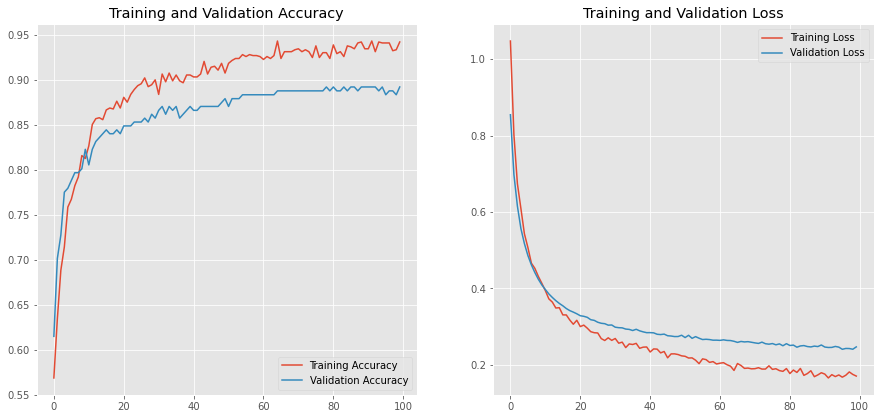

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()